## For the Loan Approval Classification Dataset
- train any two Machine Learning classifiers and achieve a minimum of 92% accuracy
- train a Deep Neural Network
- report the performance and compare the result
- Perform a Grid Search  

*Report the performance includes: Performance Metrics (Accuracy, Precision, Recall, F-1 score), confusion matrices, and loss curve. You need to train the model to achieve satisfactory results in all 4 performance metrics. For example, a higher accuracy but poor F-1 score for a model is not acceptable.*

In [28]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
### Create the dataframe
DATA_PATH = "loan_data.csv"
data = pd.read_csv(DATA_PATH)
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [18]:
# The categorial attributes
categorical_cols = data.select_dtypes(include=['object']).columns

print(categorical_cols)
print(f'Person education : {data["person_education"].unique()}')
print(f'Home ownership : {data["person_home_ownership"].unique()}')
print(f'Loan intent : {data["loan_intent"].unique()}')

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')
Person education : ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
Home ownership : ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Loan intent : ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


In [23]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


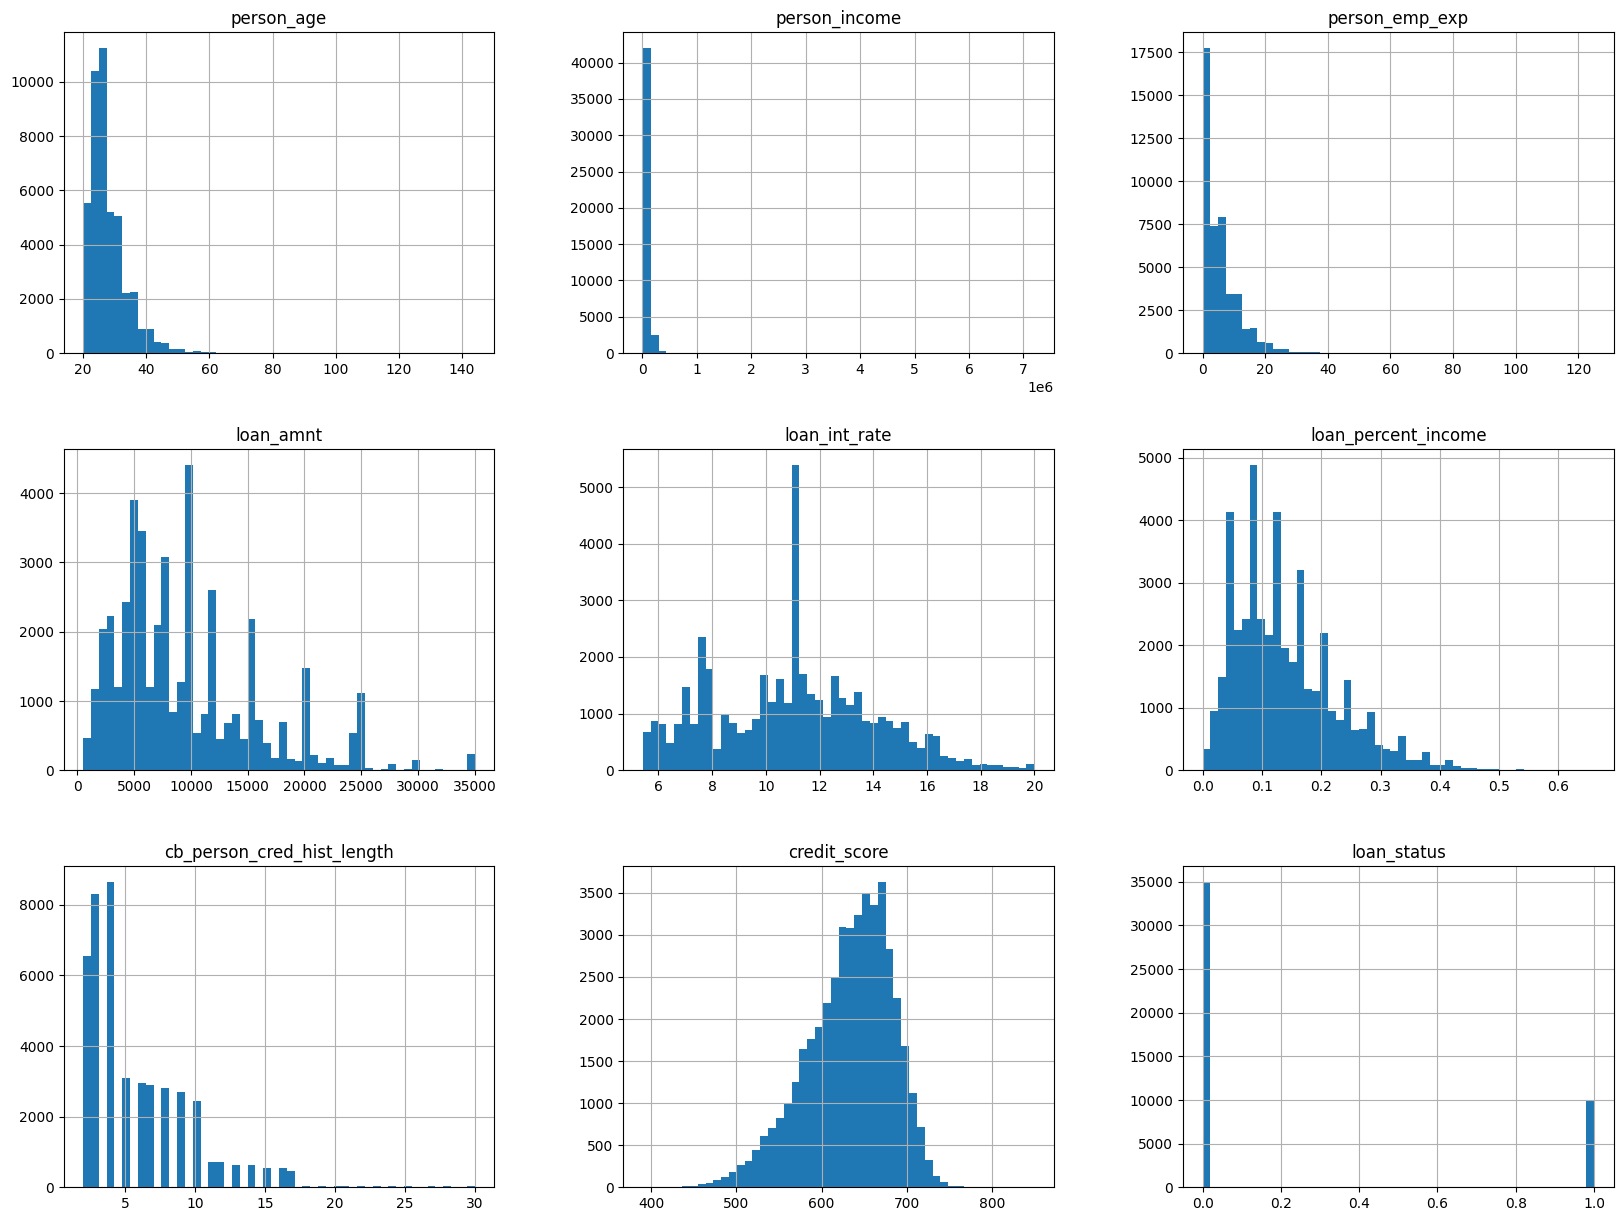

In [25]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=.2, random_state=33)

In [21]:
explore_set = train_set.copy()

In [26]:
# looking for correlation wrt loan_status
corr_matrix = explore_set.corr(numeric_only = True)
corr_matrix["loan_status"].sort_values(ascending=False)

loan_status                   1.000000
loan_percent_income           0.382791
loan_int_rate                 0.328691
loan_amnt                     0.106994
credit_score                 -0.007614
cb_person_cred_hist_length   -0.016652
person_emp_exp               -0.022707
person_age                   -0.022957
person_income                -0.153376
Name: loan_status, dtype: float64

In [30]:
explore_set.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
32290,37.0,male,Associate,109034.0,16,MORTGAGE,4000.0,DEBTCONSOLIDATION,6.62,0.04,15.0,690,Yes,0
13994,23.0,male,Bachelor,121206.0,3,MORTGAGE,35000.0,PERSONAL,16.77,0.29,3.0,667,No,0
14846,23.0,male,Bachelor,126695.0,0,MORTGAGE,25000.0,DEBTCONSOLIDATION,14.11,0.20,2.0,611,No,1
27211,30.0,female,Associate,137449.0,9,MORTGAGE,15000.0,HOMEIMPROVEMENT,6.54,0.11,6.0,580,No,1
3827,23.0,female,High School,40207.0,0,RENT,4000.0,PERSONAL,11.01,0.10,2.0,542,Yes,0


In [ ]:
explore_set.plot(kind="scatter", x="loan_intent", y="previous_loan_defaults_on_file", alpha=.4,
             label ="population", figsize=(10,7), c="loan_status", cmap=plt.get_cmap("jet"), colorbar = True)
plt.legend()

<Axes: xlabel='person_gender', ylabel='percent'>

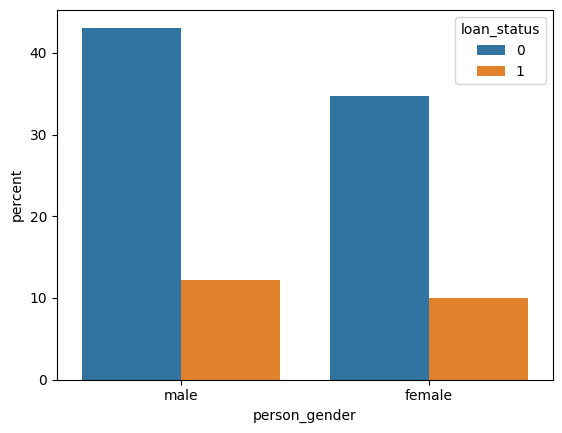

In [31]:
sns.countplot(explore_set, x="person_gender", hue="loan_status", stat="percent")

<Axes: xlabel='loan_intent', ylabel='percent'>

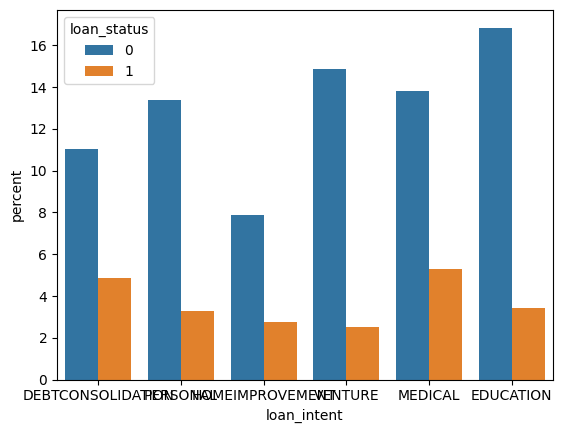

In [32]:
sns.countplot(explore_set, x="loan_intent", hue="loan_status", stat="percent")